In [37]:
# importing saved trained models

import pickle

LR = pickle.load(open('models/LR_model.pkl', 'rb'))
LR_correlated = pickle.load(open('models/LR_correlated_model.pkl', 'rb'))

RF = pickle.load(open('models/RF_model.pkl', 'rb'))
RF_correlated = pickle.load(open('models/RF_correlated_model.pkl', 'rb'))

GB = pickle.load(open('models/GB_model.pkl', 'rb'))
GB_correlated = pickle.load(open('models/GB_correlated_model.pkl', 'rb'))

SVM = pickle.load(open('models/SVM_model.pkl', 'rb'))
SVM_correlated = pickle.load(open('models/SVM_correlated_model.pkl', 'rb'))

ANN = pickle.load(open('models/ANN_model.pkl', 'rb'))
ANN_correlated = pickle.load(open('models/ANN_correlated_model.pkl', 'rb'))


Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-03-19 02:09:20           64
variables.h5                                   2023-03-19 02:09:20        21392
config.json                                    2023-03-19 02:09:20         1400
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-03-19 02:09:20           64
variables.h5 

In [38]:
# importing all train and test data

import pandas as pd

X_train = pd.read_csv('data/dataSplits/X_train.csv')
y_train = pd.read_csv('data/dataSplits/y_train.csv')

X_test = pd.read_csv('data/dataSplits/X_test.csv')
y_test = pd.read_csv('data/dataSplits/y_test.csv')

X_train_correlated = pd.read_csv('data/dataSplits/X_train_correlated.csv')
y_train_correlated = pd.read_csv('data/dataSplits/y_train_correlated.csv')

X_test_correlated = pd.read_csv('data/dataSplits/X_test_correlated.csv')
y_test_correlated = pd.read_csv('data/dataSplits/y_test_correlated.csv')


In [39]:
# checking all models accuracy

from sklearn.metrics import accuracy_score

print('Accuracy of Logistic Regression model is: ', accuracy_score(y_test, LR.predict(X_test)))
print('Accuracy of Logistic Regression model with correlated features is: ', accuracy_score(y_test_correlated, LR_correlated.predict(X_test_correlated)))

print('Accuracy of Random Forest model is: ', accuracy_score(y_test, RF.predict(X_test)))
print('Accuracy of Random Forest model with correlated features is: ', accuracy_score(y_test_correlated, RF_correlated.predict(X_test_correlated)))

print('Accuracy of Gradient Boosting model is: ', accuracy_score(y_test, GB.predict(X_test)))
print('Accuracy of Gradient Boosting model with correlated features is: ', accuracy_score(y_test_correlated, GB_correlated.predict(X_test_correlated)))

print('Accuracy of Support Vector Machine model is: ', accuracy_score(y_test, SVM.predict(X_test)))
print('Accuracy of Support Vector Machine model with correlated features is: ', accuracy_score(y_test_correlated, SVM_correlated.predict(X_test_correlated)))

a = ANN.predict(X_test) > 0.5
a = a.astype(int)

b = ANN_correlated.predict(X_test_correlated) > 0.5
b = b.astype(int)

print('Accuracy of Artificial Neural Network model is: ', accuracy_score(y_test, a))
print('Accuracy of Artificial Neural Network model with correlated features is: ', accuracy_score(y_test_correlated, b))


Accuracy of Logistic Regression model is:  0.752
Accuracy of Logistic Regression model with correlated features is:  0.744
Accuracy of Random Forest model is:  0.784
Accuracy of Random Forest model with correlated features is:  0.688
Accuracy of Gradient Boosting model is:  0.744
Accuracy of Gradient Boosting model with correlated features is:  0.72
Accuracy of Support Vector Machine model is:  0.712
Accuracy of Support Vector Machine model with correlated features is:  0.736
4/4 [==============================] - 0s 1ms/step
Accuracy of Artificial Neural Network model is:  0.656
Accuracy of Artificial Neural Network model with correlated features is:  0.744


## Random Forest model accuracy is HIGHEST : 0.784

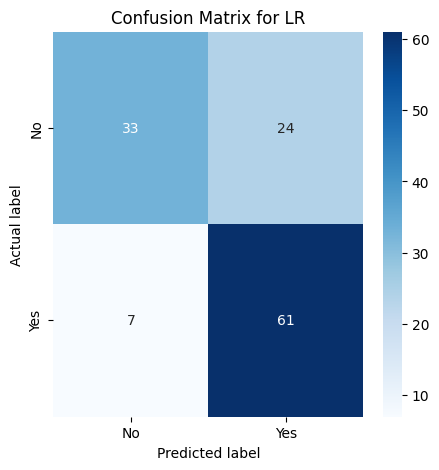

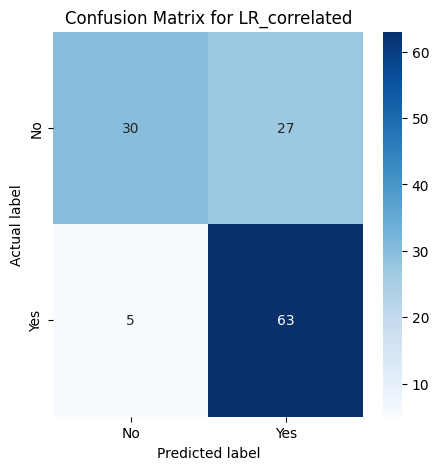

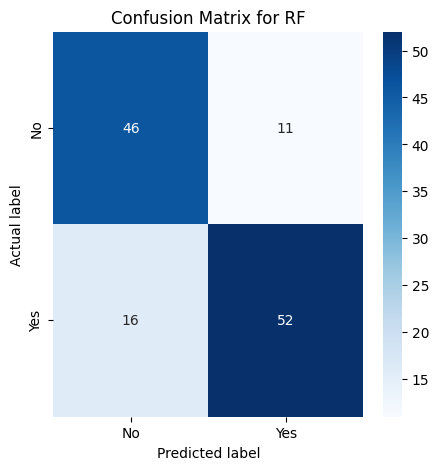

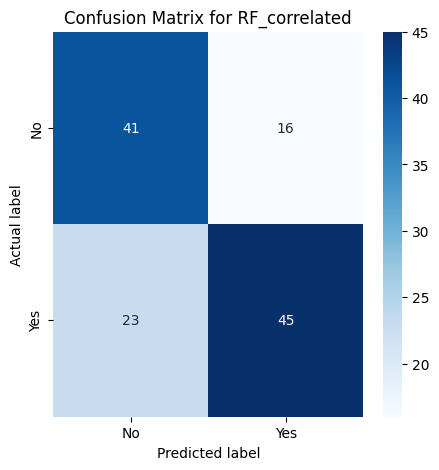

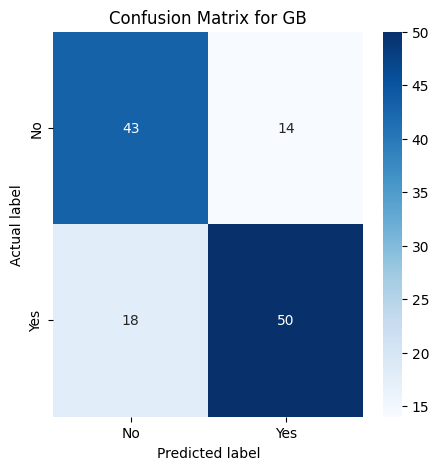

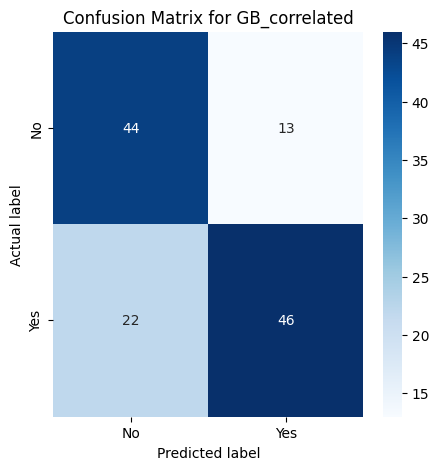

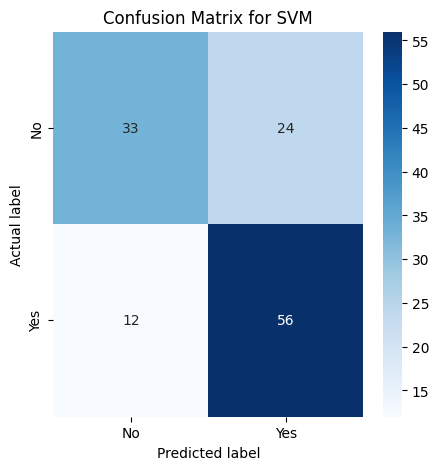

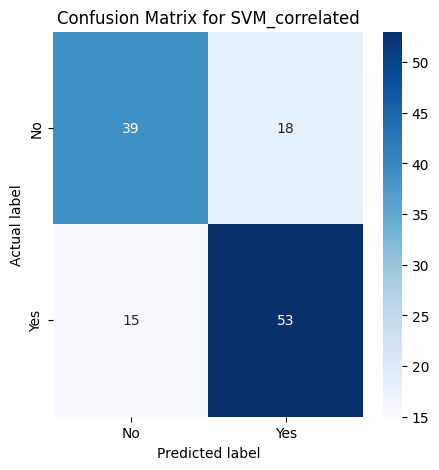

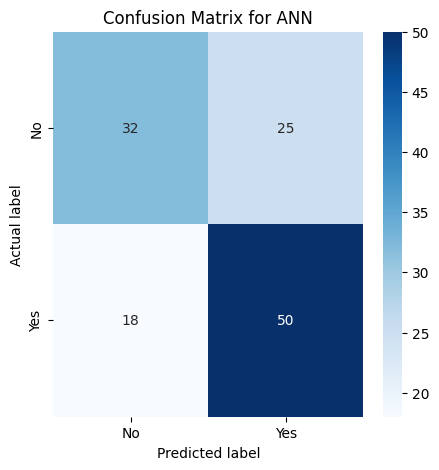

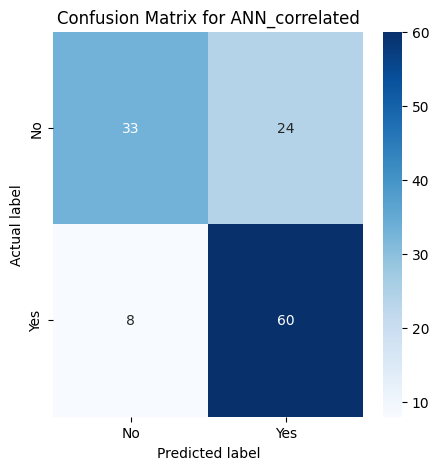

In [40]:
# plotting confusion matrix for all models

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    ax.set_title('Confusion Matrix for ' + model_name)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    plt.show()

classes = ['No', 'Yes']

plot_confusion_matrix(y_test, LR.predict(X_test), classes, "LR")
plot_confusion_matrix(y_test_correlated, LR_correlated.predict(X_test_correlated), classes, "LR_correlated")

plot_confusion_matrix(y_test, RF.predict(X_test), classes, "RF")
plot_confusion_matrix(y_test_correlated, RF_correlated.predict(X_test_correlated), classes, "RF_correlated")

plot_confusion_matrix(y_test, GB.predict(X_test), classes, "GB")
plot_confusion_matrix(y_test_correlated, GB_correlated.predict(X_test_correlated), classes, "GB_correlated")

plot_confusion_matrix(y_test, SVM.predict(X_test), classes, "SVM")
plot_confusion_matrix(y_test_correlated, SVM_correlated.predict(X_test_correlated), classes, "SVM_correlated")

plot_confusion_matrix(y_test, a, classes, "ANN")
plot_confusion_matrix(y_test_correlated, b, classes, "ANN_correlated")


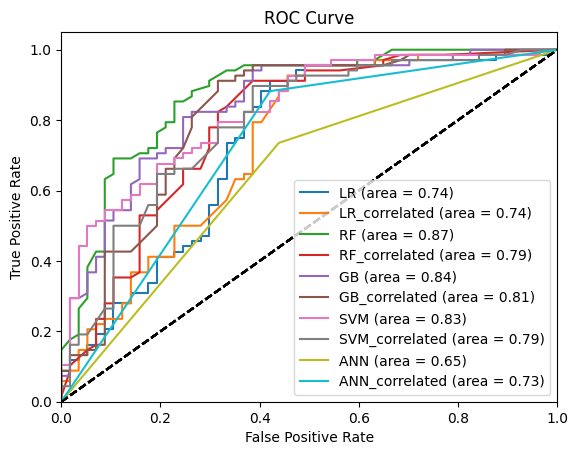

In [41]:
# plotting ROC curve for all models on same plot

from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=model_name + ' (area = %0.2f)' % roc_auc)
    
    plt.plot([0, 1], [0, 1], 'k--') # plot diagonal line
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    plt.legend(loc="lower right")

plot_roc_curve(y_test, LR.predict_proba(X_test)[:,1], "LR")
plot_roc_curve(y_test_correlated, LR_correlated.predict_proba(X_test_correlated)[:,1], "LR_correlated")

plot_roc_curve(y_test, RF.predict_proba(X_test)[:,1], "RF")
plot_roc_curve(y_test_correlated, RF_correlated.predict_proba(X_test_correlated)[:,1], "RF_correlated")

plot_roc_curve(y_test, GB.predict_proba(X_test)[:,1], "GB")
plot_roc_curve(y_test_correlated, GB_correlated.predict_proba(X_test_correlated)[:,1], "GB_correlated")

plot_roc_curve(y_test, SVM.predict_proba(X_test)[:,1], "SVM")
plot_roc_curve(y_test_correlated, SVM_correlated.predict_proba(X_test_correlated)[:,1], "SVM_correlated")

plot_roc_curve(y_test, a, "ANN")
plot_roc_curve(y_test_correlated, b, "ANN_correlated")


## Best Model

- Based on the AUC ROC value of the area under the curve, the best model is the Random Forest Classifier trained with all the features.


In [ ]:
# Cleaning up the files

# import os

# os.remove('data/dataSplits')
# os.remove('models')

# # Saving the best model

# import pickle

# pickle.dump(RF, open('RF_model.pkl', 'wb'))
